In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


In [11]:
gold_data = pd.read_csv('gld_price_data.csv')
a=lambda x:(x["Date"].split("/"))[2]
gold_data["Date"]=gold_data.apply(a,axis=1)
gold_data.head()
gold_data["Date"]=gold_data["Date"].astype("float64")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008.0,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008.0,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008.0,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008.0,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008.0,1390.189941,86.779999,76.059998,15.590,1.557099


<Axes: ylabel='GLD'>

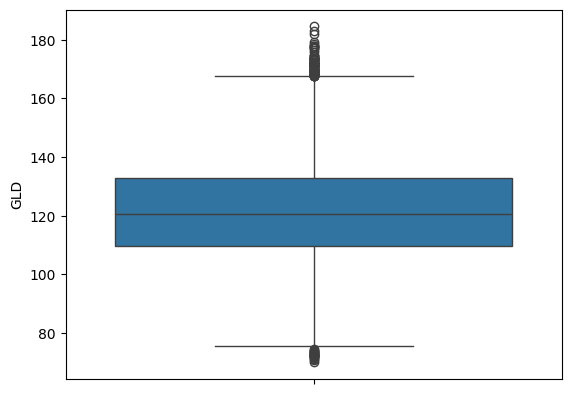

In [36]:
sns.boxplot(gold_data['GLD'])

<Axes: >

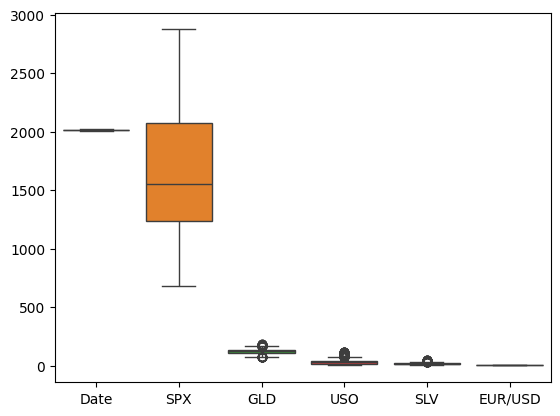

In [37]:
sns.boxplot(gold_data)

In [12]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018.0,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018.0,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018.0,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2018.0,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2018.0,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.shape

(2290, 6)

In [14]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   float64
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(6)
memory usage: 107.5 KB


In [15]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2012.724891,1654.315776,122.732875,31.842221,20.084997,1.283653
std,2.993271,519.111540,23.283346,19.523517,7.092566,0.131547
min,2008.000000,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010.000000,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013.000000,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015.000000,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018.000000,2872.870117,184.589996,117.480003,47.259998,1.598798


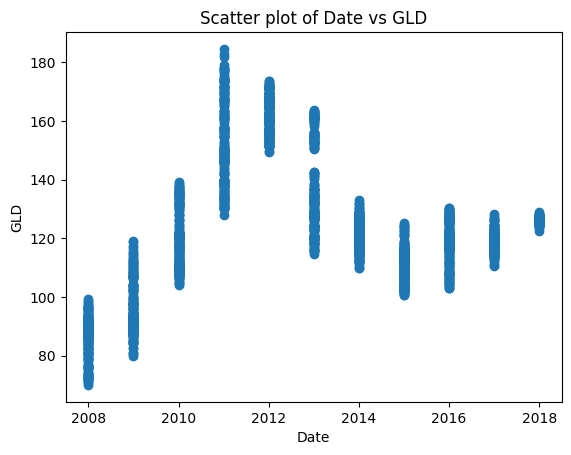

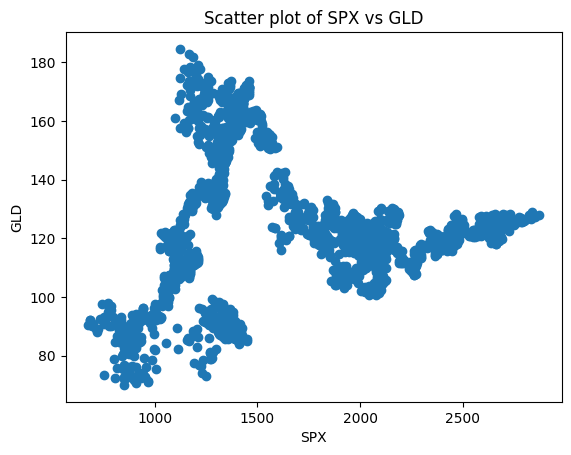

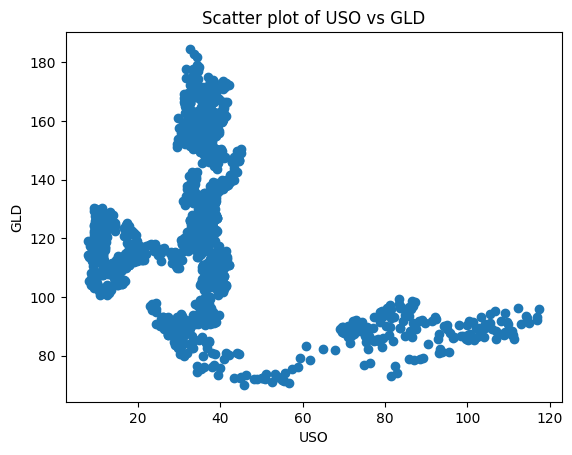

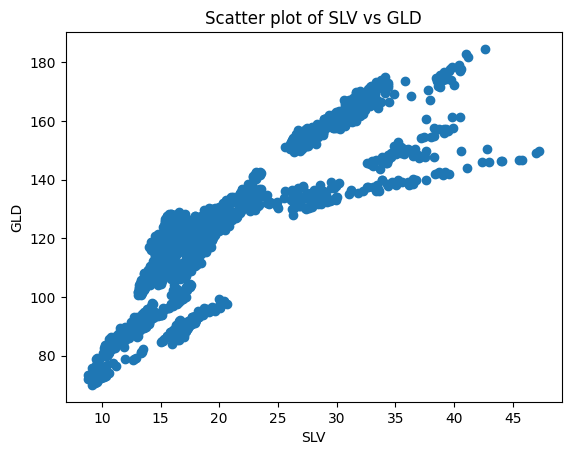

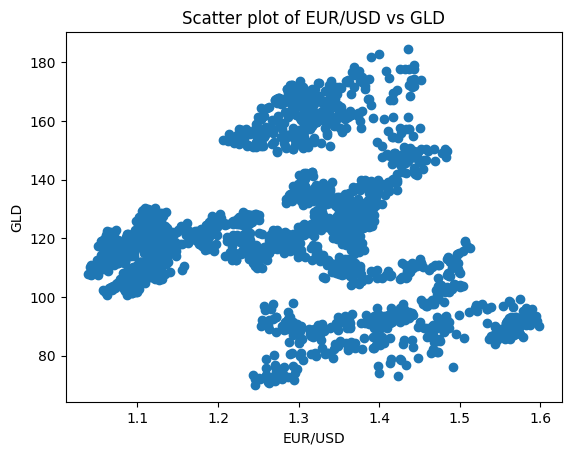

In [27]:
output = 'GLD'
for i in gold_data.columns:
    if i != output:
        plt.scatter(gold_data[i], gold_data[output])
        plt.xlabel(i)
        plt.ylabel(output)
        plt.title(f'Scatter plot of {i} vs {output}')
        plt.show()

<Axes: >

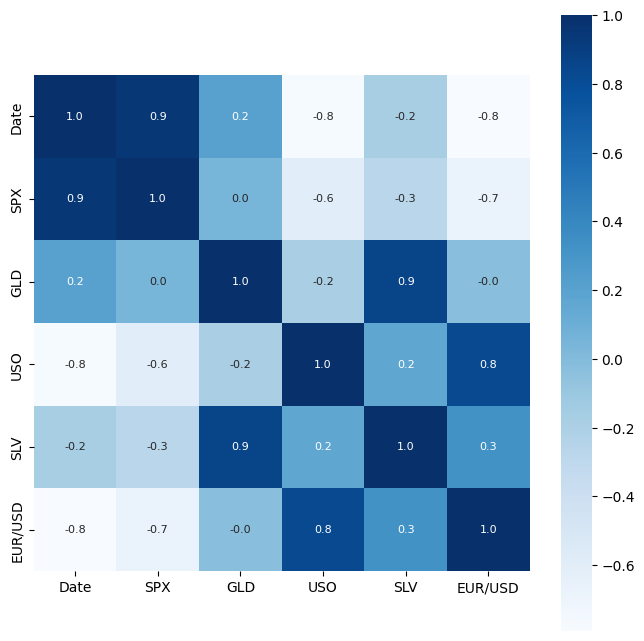

In [39]:
correlation = gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
correlation['GLD']

Date       0.206654
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Thoran\AppData\Local\Temp\ipykernel_9492\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

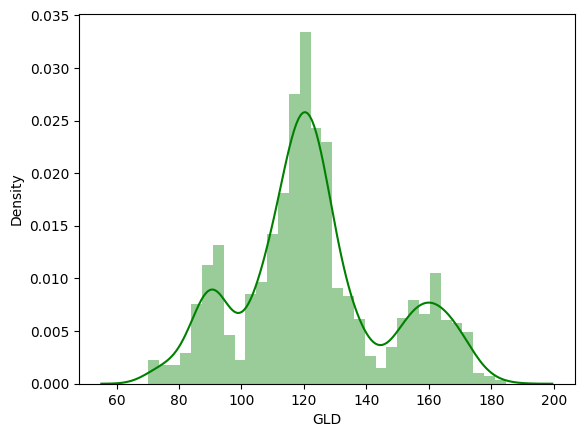

In [21]:
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target


In [23]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [24]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [46]:
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)
Y_test = list(Y_test)

R squared error :  0.9885119198572557


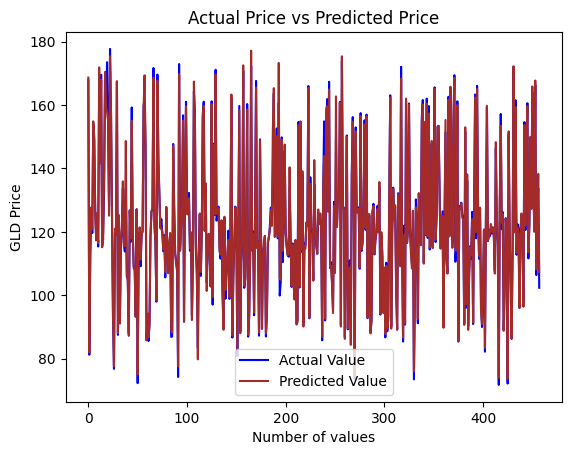

In [51]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='brown', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()